# 「選擇權」履約價＆成交量分析
資料來源：[期交所 選擇權買賣日報表](https://www.taifex.com.tw/cht/3/dailyOptions)

## Part 1: 讀取 選擇權買賣日報表

In [24]:
import pandas as pd
df = pd.read_csv('20220323_TXO_202203W4_C.csv', encoding = 'big5hkscs', skiprows = 1)
df

,履約價格,成交價格,全市場成交量,買進期貨商代號,買進期貨商名稱,賣出期貨商代號,賣出期貨商名稱
0,16600,1100,1,F034,澳帝華期貨,F039,大昌期貨
1,16800,860,1,F004,凱基期貨,F034,澳帝華期貨
2,16850,945,1,F020,群益期貨,S980,元大證券
3,16900,765,1,F008,統一期貨,S884,玉山證券
4,16900,770,4,F008,統一期貨,F034,澳帝華期貨
...,...,...,...,...,...,...,...
12843,18500,0.1,4,F018,元富期貨,F034,澳帝華期貨
12844,19000,0.5,1,F007,日盛期貨,F005,國票期貨
12845,19000,0.6,1,F007,日盛期貨,F021,元大期貨
12846,19300,0.1,2,F030,兆豐期貨,F030,兆豐期貨


## Part 2: 資料處理

#### 2.1: 選取 「履約價格」, 「全市場成交量」欄位

In [25]:
df = df[['履約價格', '全市場成交量']]
df

,履約價格,全市場成交量
0,16600,1
1,16800,1
2,16850,1
3,16900,1
4,16900,4
...,...,...
12843,18500,4
12844,19000,1
12845,19000,1
12846,19300,2


#### 2.2: 刪除沒有資料的列

In [26]:
df = df.drop(df[df.全市場成交量 == ' '].index)
df

,履約價格,全市場成交量
0,16600,1
1,16800,1
2,16850,1
3,16900,1
4,16900,4
...,...,...
12843,18500,4
12844,19000,1
12845,19000,1
12846,19300,2


#### 2.3: 資料轉型 - 把數值資料從文字改為整數

In [29]:
for row in range(len(df)):
    df.iloc[row, 1] = int(df.iloc[row, 1])

#### 2.4: 計算各履約價總成交量

In [33]:
df.head(20)

,履約價格,全市場成交量
0,16600,1
1,16800,1
2,16850,1
3,16900,1
4,16900,4
5,16900,8
6,16900,4
7,16900,9
8,16900,1
9,16900,7


In [34]:
df_sum = df.groupby('履約價格').sum()
df_sum

,全市場成交量
履約價格,
16600,1
16800,1
16850,1
16900,34
16950,76
17000,87
17050,34
17100,75
17150,42


## Part 3: 畫出台指選履約價格＆成交量圖

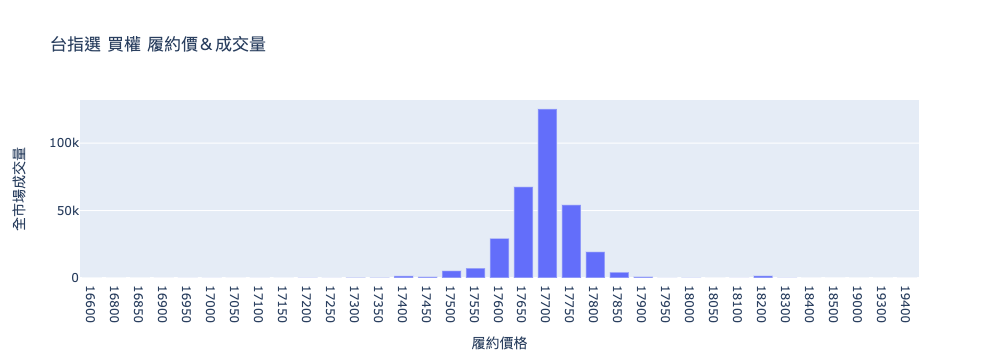

In [35]:
import plotly.express as px
fig = px.bar(df_sum, x = df_sum.index, y = '全市場成交量', title = '台指選 買權 履約價＆成交量')
fig.show()

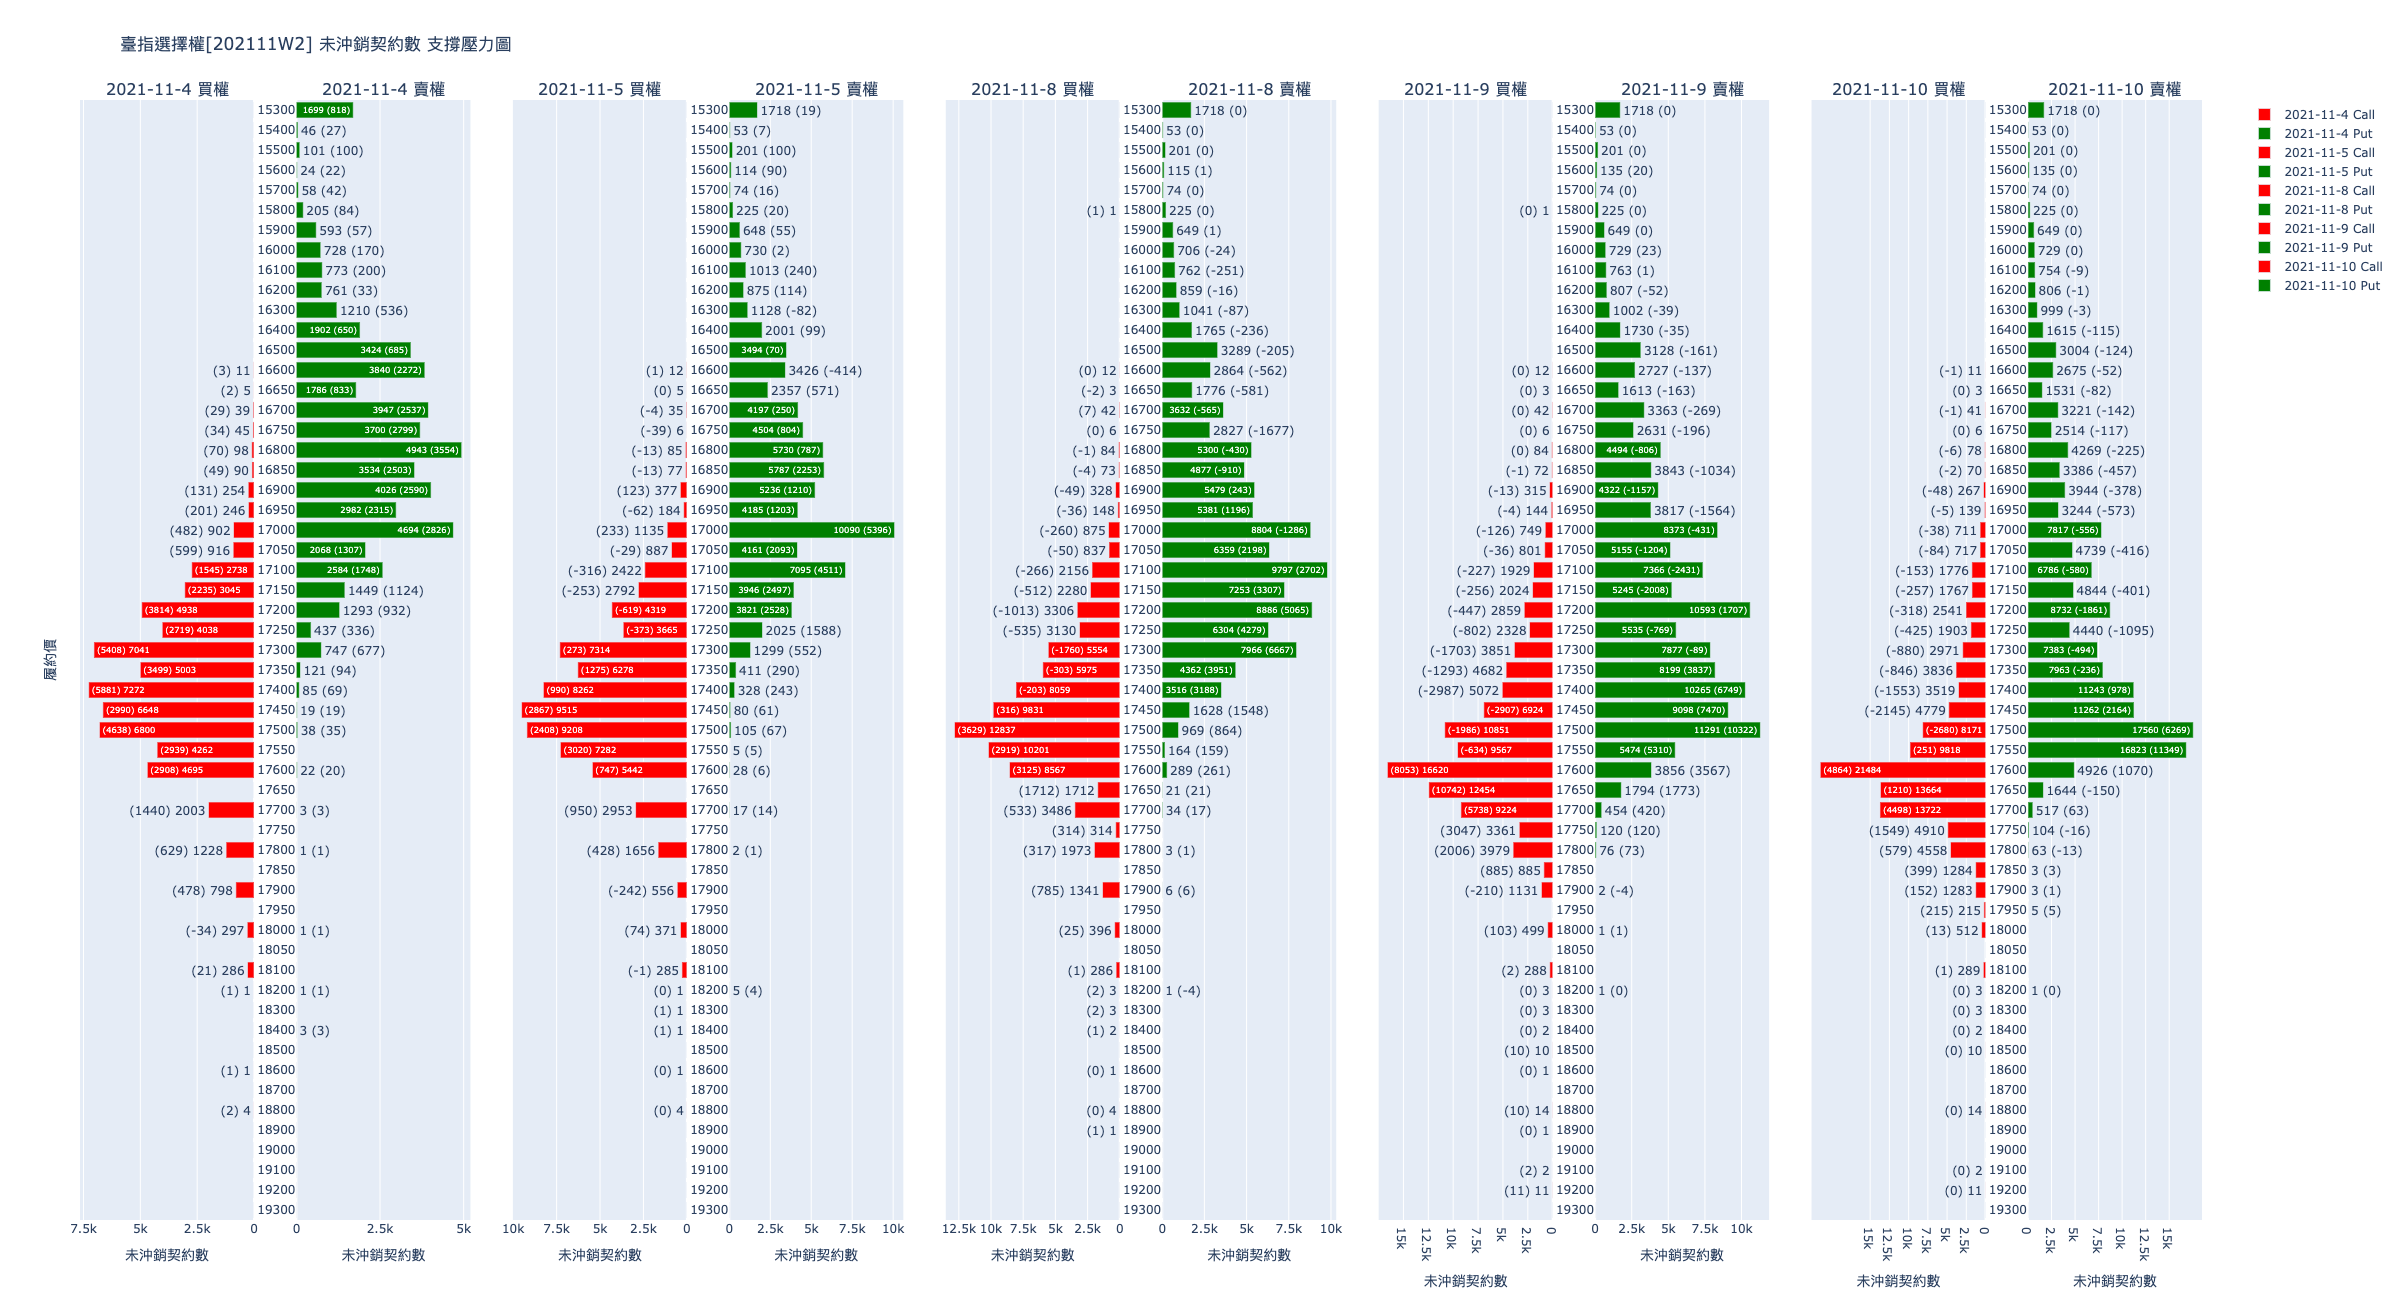

In [36]:
from IPython.display import Image
Image(filename = 'img.png')